## 2016313844  Jeonghoon Park

### Gaussian Naive Bayes Model Learning
### Visualization

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


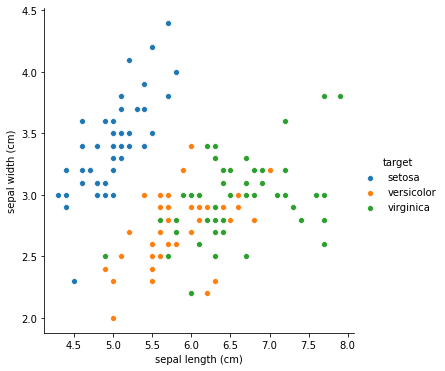

In [3]:
import seaborn as sn
sn.pairplot(iris_frame, x_vars=["sepal length (cm)"],
           y_vars = ["sepal width (cm)"],
           hue = "target",
           height=5)

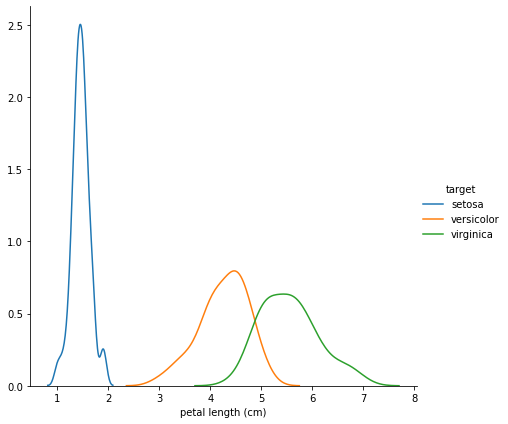

In [5]:
sn.FacetGrid(iris_frame,
            hue="target",
            height=6).map(sn.kdeplot, "petal length (cm)").add_legend()

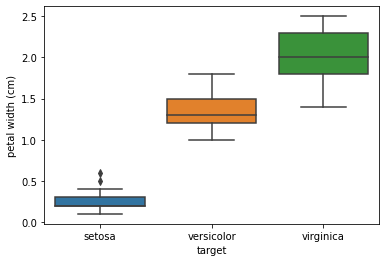

In [6]:
sn.boxplot(x="target", y="petal width (cm)",
          data=iris_frame)

Text(0.5, 1.0, 'Gaussian Naive Bayes boundaries')

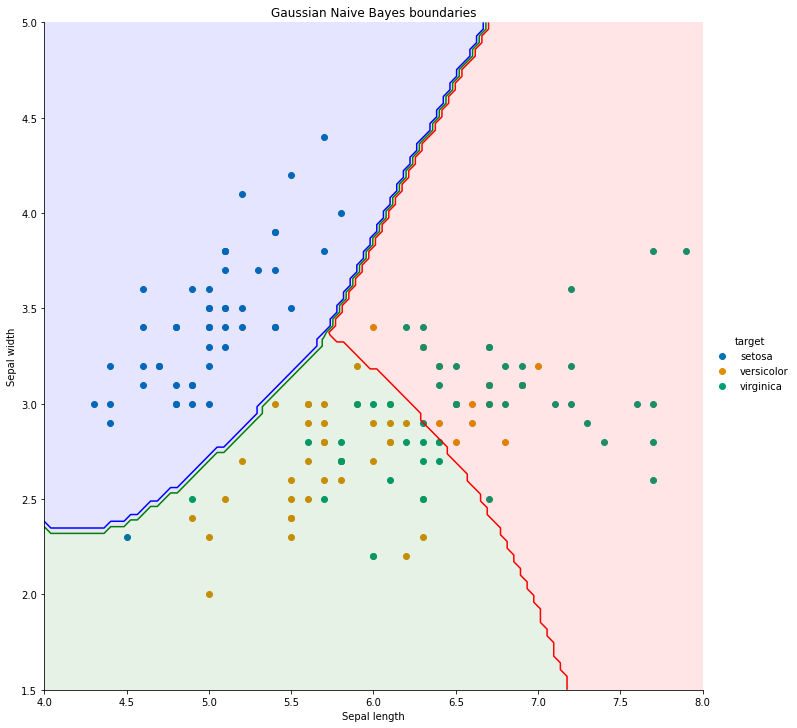

In [8]:
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB 
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)", "target" ]]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
NB=GaussianNB() 
NB.fit(X,Y)
N=100

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sn.FacetGrid(iris_frame, hue = "target", height =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [NB.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes boundaries')